# 1. Loading the dataset

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
data = pd.read_csv("/content/diabetes_dataset.csv")

# 2. Overview of the dataset

In [251]:
print("Shape of the original dataset:")
data.shape

Shape of the original dataset:


(100000, 9)

In [252]:
print("Available columns:")
data.columns

Available columns:


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [253]:
print("Column data types:")
data.dtypes

Column data types:


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [254]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [255]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [256]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [257]:
data.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

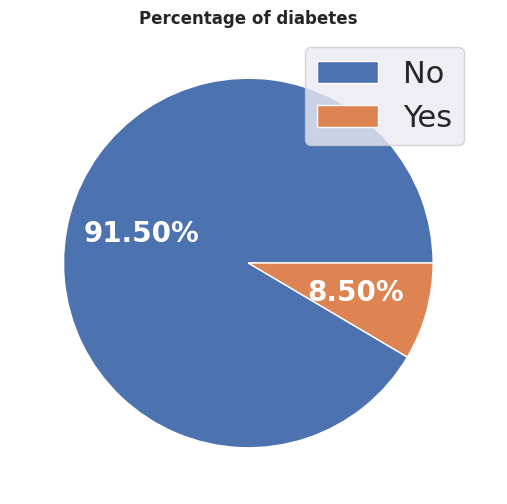

In [258]:
plt.figure(figsize = (6, 6))
plt.pie(pd.value_counts(data['diabetes']),
        labels = ['No','Yes'],
        autopct = '%.2f%%',
        textprops = {'size' : 'small',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of diabetes', fontsize = 12, fontweight = 'bold')
plt.show()

**Findings from the overview:**
<br>Shape: 9 columns, 100000 rows
<br>No missing values
<br> Data is imbalanced (only 8.5% of total have diabetes)
<br> The data series available can be summarized into the following feature categories affecting diabetes:

- gender
- age
- hypertension
- heart_disease
- smoking_history
- bmi
- HbA1c_level
- blood_glucose_level

**Goal of the project:** Analyze and evaluate the contribution of these factors on diabetes, and develop a machine learning model capable of predicting diabetes in patients based on their medical history and demographic information.


Thus, diabetes will be treated as the Dependent Variable from now on and it will be investigated how diabetes depends on the other features/variables.

# 3. Oversampling
To take care of imbalanced data

In [259]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [260]:
X = data.drop(columns='diabetes').values
Y = data['diabetes'].values.reshape(-1,1)

In [261]:
B_method = over_sampling.RandomOverSampler(random_state=42)
x_ROS , y_ROS = B_method.fit_resample(X,Y)
newdf = pd.DataFrame(x_ROS);newdf['diabetes']=y_ROS
newdf = newdf.reset_index(drop=True)

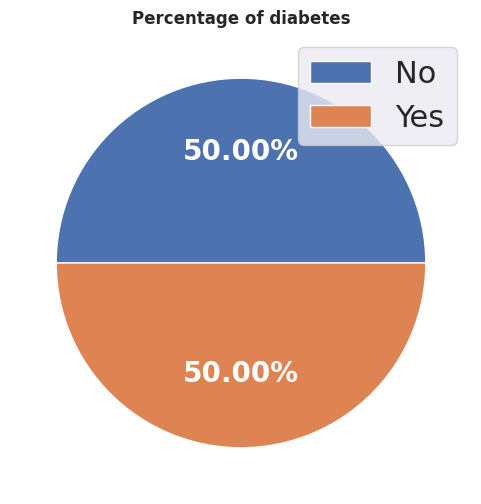

In [262]:
plt.figure(figsize = (6, 6))
plt.pie(pd.value_counts(newdf['diabetes']),
        labels = ['No','Yes'],
        autopct = '%.2f%%',
        textprops = {'size' : 'small',
                     'fontweight' : 'bold',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of diabetes', fontsize = 12, fontweight = 'bold')
plt.show()

In [263]:
newdf.columns= ['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']
newdf.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Now the data is balanced

# 4. Label Encoding
Converting categorical columns into numerical ones

In [264]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [265]:
gender=enc.fit_transform(newdf['gender'])
smoking_history=enc.fit_transform(newdf['smoking_history'])
newdf['gender']=gender
newdf['smoking_history']=smoking_history

In [266]:
newdf.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [267]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183000 entries, 0 to 182999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   gender               183000 non-null  int64 
 1   age                  183000 non-null  object
 2   hypertension         183000 non-null  object
 3   heart_disease        183000 non-null  object
 4   smoking_history      183000 non-null  int64 
 5   bmi                  183000 non-null  object
 6   HbA1c_level          183000 non-null  object
 7   blood_glucose_level  183000 non-null  object
 8   diabetes             183000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.6+ MB


In [268]:
newdf = newdf.applymap(lambda x: pd.to_numeric(x, errors='ignore'))

print("Print the column data types after transformation:")
newdf.dtypes

Print the column data types after transformation:


gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# 5. Selection of dependent and independent variables
Dependent variable (DV) to be predicted:
<br>diabetes
<br><br>Features/independent variables(IV):
<br>gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level

<br> These are accordingly defined as features (IV) and labels (DV) and transformed to numpy arrays for the input into the random forest model.

In [269]:
# choose features and label columns
feature_cols = ['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']
label_col = ['diabetes']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(newdf[feature_cols])
labels =  np.array(newdf[label_col])

# 6. Splitting the dataset into training and testing data

The dataset will be divided into a training and testing subset with the ratio of 3:7.In order to achieve better generalization of the predictions, cross-validation will be used on the training set for the purposes of feature selection, hyperparameter tuning and the evaluation of the model with the best features.

In [270]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split

In [271]:
# define a random state number for all random operations
random_state_num = 0

# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.7, random_state=random_state_num)

# 7. Feature engineering
In order to select the best reference value to work with for diabetes, its relationship with the other variables should be investigated. The aim here is to check which units allow for better correlation with the biggest amount of other features. This is done by examining the correlation matrix of all features:

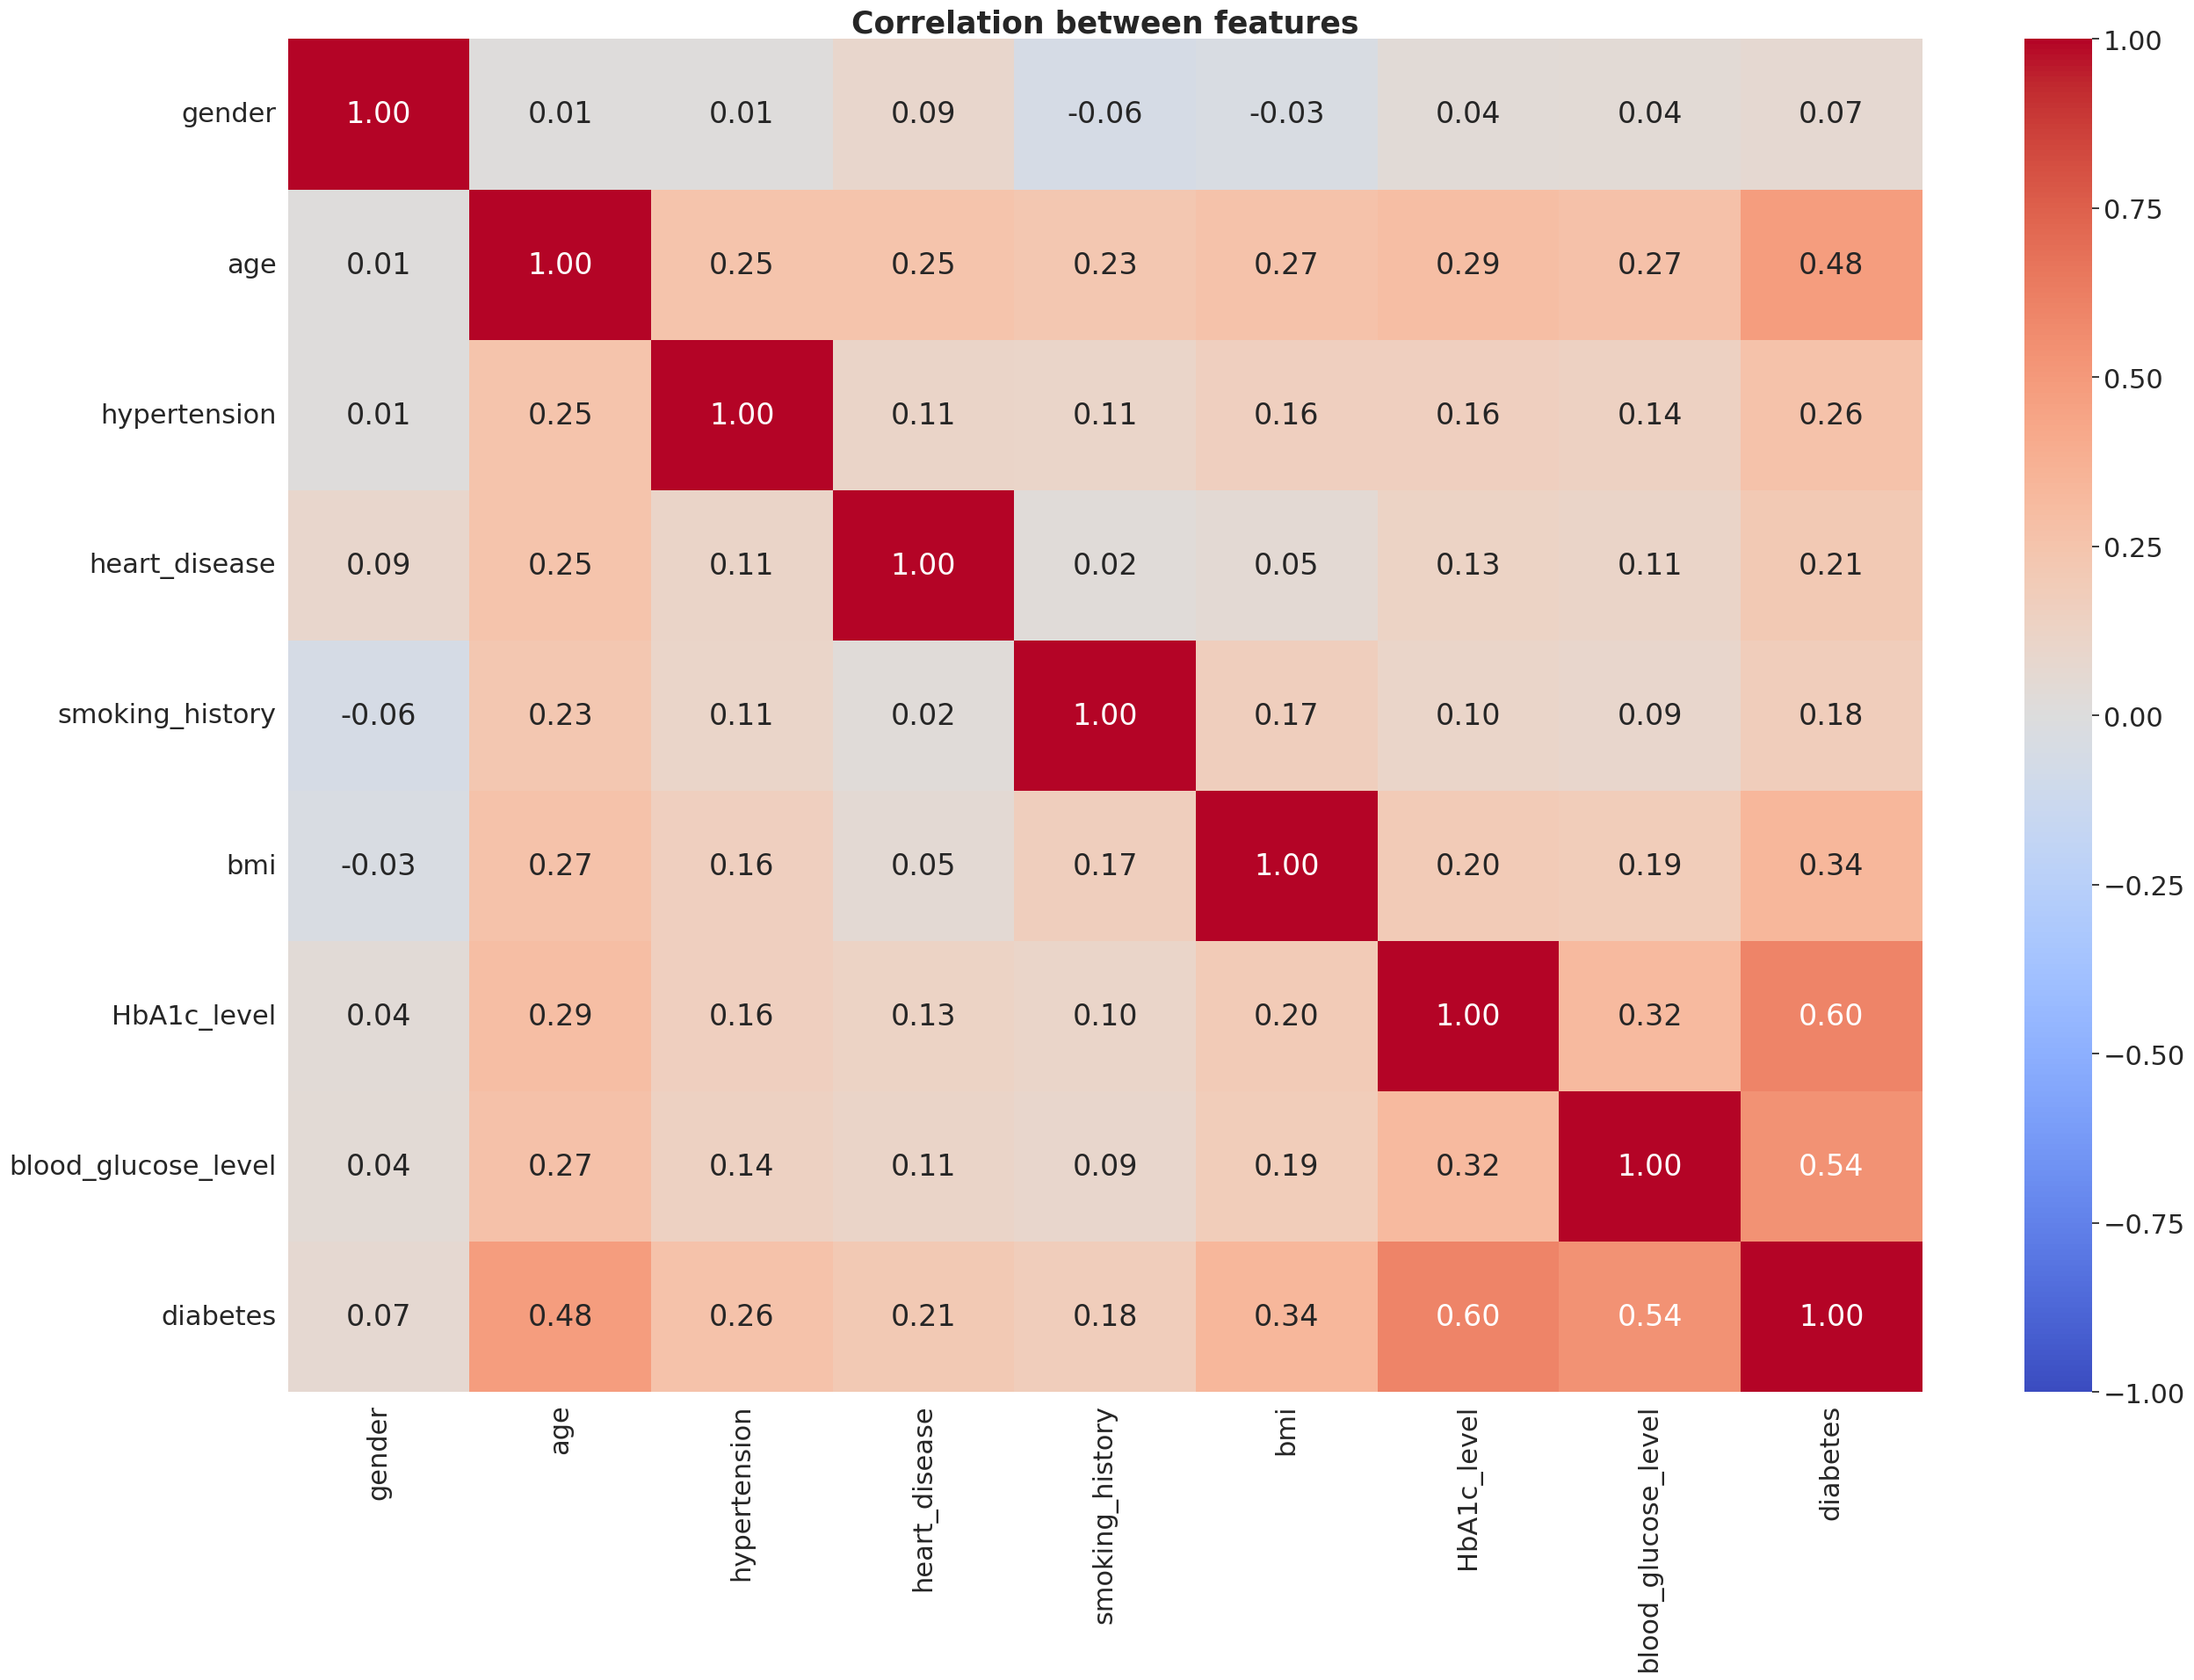

In [273]:
# select all features
features_all = newdf[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)

Diabetes correlates most with the features HbA1c_level and blood_glucose_level

# 8. Feature selection
Feature selection has to be conducted to decide which features would be most suitable for the current predictive challenge. For the purpose of better prediction generalization on new data, the features are selected by evaluating a Random Forest model for different combinations of features involved, simultaneously using cross-validation.

The feature ranking class sklearn.feature_selection. RFECV used here incorporates recursive feature elimination and cross-validated selections. Once fitted to the training data, it ranks the models with the different features by the R2 score and returns this rank. Consequently, only the most relevant features are kept for the further analysis for both the training and testing dataset.

In [274]:
from sklearn import feature_selection as fs
from sklearn.ensemble import RandomForestRegressor

In [275]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an objects for a model for recursive feature elimination witfh CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 1 1 1 1 1 1 1]
Chosen important features:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


According to the feature rankings, all the parameters for this data set (with ranking 1) are important

All these will be kept for the further analysis for both the training and testing dataset

# 9. Hyperparameter tuning
Random Forest is an algorithm with multiple hyperparameters which can have a range of values. In order to find the hyperparameters which would be most suitable for the current data, it is necessary to conduct hyperparameter tuning. The parameters which will be tuned in this case are:

<br>n_estimators - number of decision trees in the random forest
<br>max_features - number of features to consider at every split
<br>max_depth - maximum number of levels in a tree
<br>min_samples_split - minimum number of samples required to split a node
<br>min_samples_leaf - minimum number of samples required at each leaf node
<br><br>The tuning is executed by applying a cross-validated evaluation of the model for different combinations of preliminary defined ranges for the parameters. The output is the model with the hyperparameters which exhibits the best R2 score compared to other parameter combinations.

Define the hyperparameter ranges to be investigated as a parameter grid (dictionary param_grid):

In [281]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Define the RandomizedSearchCV object, which will evaluate the R2 scores of models with randomly picked combinations from the defined hyperparameter grid:

In [282]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

Once fitted to the training data, it will return a Random Forest model in the best_estimator_ parameter with the hyperparameter combination which allows for the best R2 score for the current data among all the tested parameter combinations.

After the model with the best R2 score and thus best hyperparameter combination has been found, it will be refitted to the training data (parameter refit=True of the RandomizedSearchCV object).

The best hyperparameters are printed:

In [283]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [284]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

# 10. Evaluation of the model with the best hyperparameters on the training data with cross-validation
The random forest model object rf_best_model with the most important features and the most suitable hyperparameters will be now evaluated on the training data with cross-validation first:

In [285]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.888
Standard deviation of the R2 score over all folds = 0.003
R2 score for each fold:
Fold  1    0.883
Fold  2    0.886
Fold  3    0.889
Fold  4    0.891
Fold  5    0.892
Fold  6    0.890
Fold  7    0.885
Fold  8    0.890
Fold  9    0.883
Fold 10    0.887


The training and evaluation on cross-validated folds improve the model generalization capabilities and the result of R2=0.888 stands for the mean R2 score for all folds.

Each of the 10 folds exhibits R2 scores between 0.883 and 0.892 with a very small standard deviation of 0.003. This shows that the model has achieved good predictions for all the folds without any particular one that stands out with a worse result

# 11. Validate the model on the testing data
Finally, the model should be validated on the test data. The developed model rf_best_model is used to predict whether a person has diabetes based on the features of the test subset. The quality of the predictions is evaluated by the metrics R2 score, Mean Squared Error and Root Mean Squared Error:

In [292]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2 =",r2)
print("Mean Squared Error: MSE =",mse)
print("Root Mean Squared Error: RMSE =",rmse)
print("Correlation coefficient R = "+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))

R2 = 0.8950317022550063
Mean Squared Error: MSE = 0.026241989839128958
Root Mean Squared Error: RMSE = 0.1619937956809734
Correlation coefficient R = 0.95


The obtained R2 score is 0.895 and the correlation coefficient is 0.95. The predictions of diabetes correlate well with their true values. Following measures have been taken to avoid overfitting and increase confidence of generalization:

<br>- dataset splitting with only 30% of the observations as a training subset
<br>- cross validation (during hyperparameter tuning and the model training on the training subset)

# 12. Conclusions
During model development and training, all measures have been taken into account in order to ensure best possible generalization of the model on previously unseen data. Even in this case, the evaluation metrics yield the mean coefficient of determination of R2=0.888 on the cross-validated training set, as well as for each cross-validation fold. Moreover, the predictions from the test set feature data show a very promising correlation with the true values and a coefficient of determination of R2=0.895 as well.


**The data allows the prediction of diabetes from medical history and demographic features: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level with a Precision of R2=89.5%.**